# ODrive setup

## Hardware requirements
1. Brushless DCmotor D5065
2. Odrive 24V variant
3. DC power supply
4. Brake resistor
5. Heat sinks
6. Encoder AMT102
7. 3D printed Motor Casing
8. Encoder Cable

# Wiring of motor

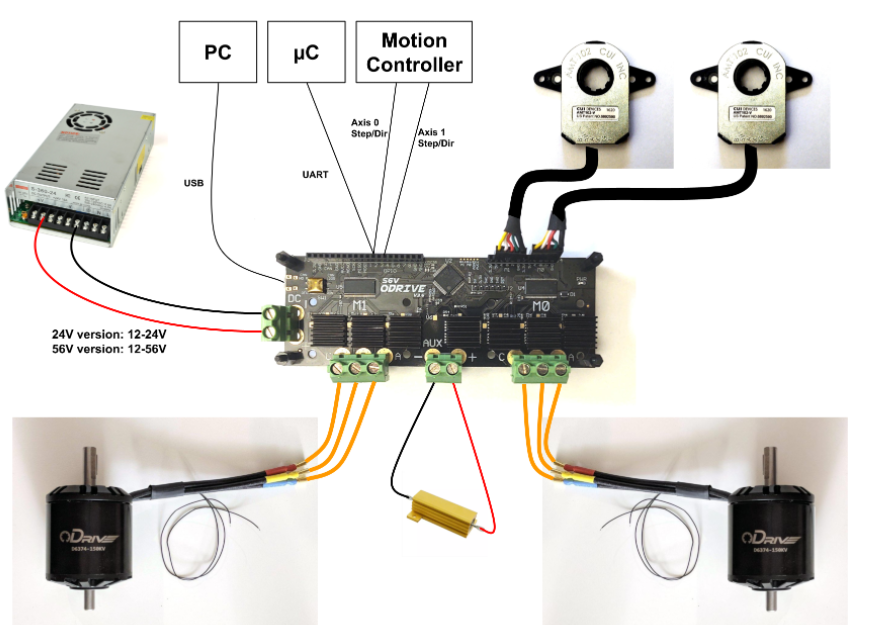


# Powering Up
* Odrive board gets its power when a DC supply is given
* Set DC supply to 24V 2.5A , This is enough to run the motor at 4000rpm
* Unlike some devices, the ODrive does not recieve power over the USB port so the 24/56 volt power input is required even just to communicate with it using USB. It is ok to power up the ODrive before or after connecting the USB cable.

# Downloading and Installing Tools (Windows)
* Install python first
* Standalone pythonwill also work but [Anaconda python](https://www.anaconda.com/products/individual#Downloads)  is recomended as it has more tools.
* If python is already installed in the system then it is recomended to replace it with Anaconda. 
* After installing the python Start Anaconda Prompt from the start menu.
* If command `python --version` returns python version then our python is ready.
* Now install odrivetools by typing  `pip install --upgrade odrive`

# Setting up the Odrive using zadig utility tool


* Turn on the DC supply Connect the Odrive board to PC
* Run the zadig application
* Click on the options and select list all the devices
* Select Odrive 3.6 native interface 2 and select he driver as libusb-win32 -- > Replace driver
* Now from the Anaconda prompt type odrivetool it should detect the odrive.
* If using Jupyter notebook then type


import odrive
odrv0=odrive.find_any()




# Upgrading firmware ()

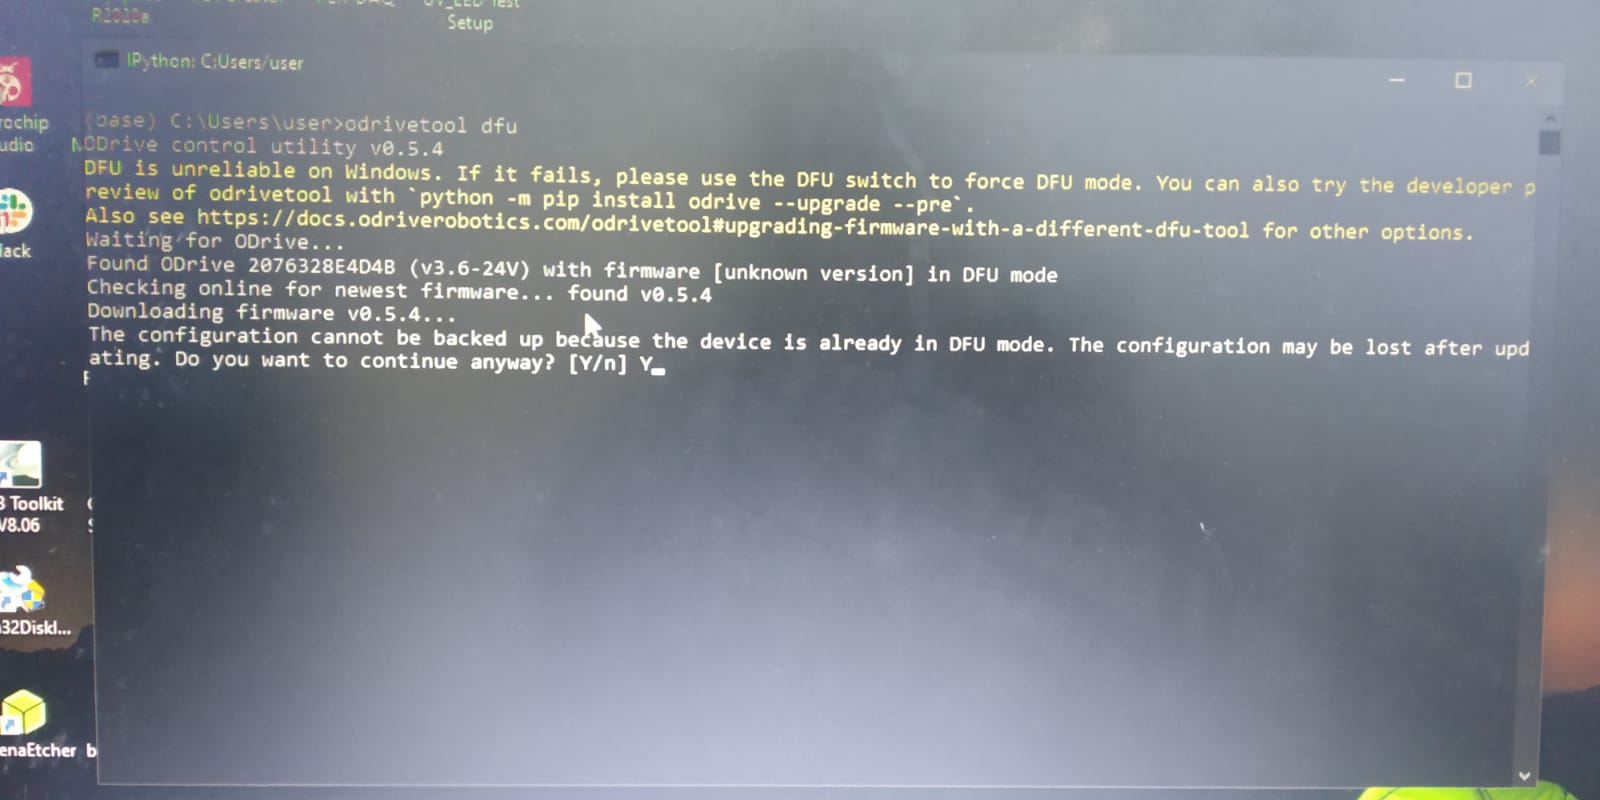
## Option 1
 * Type `odrivetool dfu` to upgrade the firmware
 * It will detect the odrive and Odrive will enter into  dfu mode then it will check for new firmware available on github then it will start downloading the firmware
 * If everything goes well then firmware will be flashed.
 * During the update, a new device called “STM32 BOOTLOADER” will appear. Open the Zadig utility and set the driver for “STM32 BOOTLOADER” to libusb-win32. After that the firmware update will continue.
 * If this this doesnot work then try with STM32cube programmer.
 
## Option 2


### Using STM32CubeProgrammer.

* STM32CubeProgrammer can be downloaded from the link](https://www.st.com/en/development-tools/stm32cubeprog.html)
* Force the ODrive into DFU mode, Flick the DIP switch that says “DFU, RUN” to “DFU” and power cycle the board. If that alone doesn’t work, also connect the pin “GPIO6” to “GND”. After you’re done upgrading firmware, don’t forget to put the switch back into the “RUN” position and power cycle the board again..
* Launch the tool.
* download the firmware from here[ODriveFirmware_v3.6-24V.hex](https://github.com/odriverobotics/ODrive/releases/tag/fw-v0.5.4)
* Under “Memory & File edition”, there are two tabs called “Device memory” and “Open file”. Click “Open file” and choose the ODrive firmware hex file that you downloaded or compiled.
* In the top right, there is a dropdown menu containing the different methods to connect to an STM32 device. Choose “USB”.
* Under “USB configuration”, a USB port should be automatically selected and the ODrive serial number should be present next to “Serial number.”
* Click “Connect” above “USB configuration”.
* Click the tab with the name of your firmware file (example: ODriveFirmware_v3.6-56V.hex) if it is not already selected.
* Click “Download” to flash your ODrive with the firmware. Your ODrive is now flashed!
* Close STM32CubeProgrammer.
* Turn off the power to the ODrive and set the DIP swtich back to RUN mode.

#### Now repeat the zadig utility setup and start working

 # ODrive configuration Parameters

odrv0.erase_configuration()

odrv0.config.enable_brake_resistor = True

odrv0.config.brake_resistance = 0.7

odrv0.config.dc_bus_undervoltage_trip_level = 8

odrv0.config.dc_bus_overvoltage_trip_level = 25.5

odrv0.config.dc_max_positive_current = 20

odrv0.config.dc_max_negative_current = -0.010

odrv0.config.max_regen_current = 0





odrv0.save_configuration()




 odrv0.axis0.motor.config.pole_pairs = 7
 
 odrv0.axis0.motor.config.calibration_current = 15
 
 odrv0.axis0.motor.config.motor_type = 0	# high current
 
 odrv0.axis0.motor.config.resistance_calib_max_voltage = 2
 
 odrv0.axis0.motor.config.torque_constant = (8.27/270) #replace 270 with 330 for d5312 motor
 
 odrv0.axis0.motor.config.current_lim = 40 #keep it 35 for d5312s motor
 
 odrv0.axis0.motor.config.requested_current_range =60




odrv0.save_configuration()




odrv0.axis0.encoder.config.mode = 0 # incremental
 
odrv0.axis0.encoder.config.cpr = 8192

odrv0.axis0.encoder.config.bandwidth = 1000 #check first

odrv0.axis0.config.calibration_lockin.current = 10 # check first

odrv0.axis0.config.calibration_lockin.ramp_time = 0.4 

odrv0.axis0.config.calibration_lockin.ramp_distance = 3.1415927410125732 

odrv0.axis0.config.calibration_lockin.accel = 20 

odrv0.axis0.config.calibration_lockin.vel = 40




odrv0.save_configuration()





 odrv0.axis0.controller.config.control_mode = 3  #CONTROL_MODE_POSITION_CONTROL

 odrv0.axis0.controller.config.vel_limit = 69 # (69 * 60)rpm 

## Adjust below gains when in closed loop control for the first time
 odrv0.axis0.controller.config.pos_gain = 13
 
 odrv0.axis0.controller.config.vel_gain = 0.12
 
 odrv0.axis0.controller.config.vel_integrator_gain = 0
 


 odrv0.axis0.controller.config.input_mode = 5 # trap traj

odrv0.axis0.trap_traj.config.vel_limit = 50

odrv0.axis0.trap_traj.config.accel_limit = 30

odrv0.axis0.trap_traj.config.decel_limit = 30





odrv0.save_configuration()




odrv0.axis0.motor.is_calibrated  # check

odrv0.axis0.requested_state = 4 # AXIS_STATE_MOTOR_CALIBRATION

odrv0.axis0.motor.config.pre_calibrated = True

odrv0.axis0.requested_state = 7 # encoder offset calibration

odrv0.axis0.requested_state = 8 # closed loop control

#odrv0.axis0.config.startup_encoder_offset_calibration

odrv0.axis0.encoder.config.use_index = True

#odrv0.axis0.config.startup_encoder_index_search = True

#odrv0.axis0.config.startup_closed_loop_control = True



odrv0.save_configuration()

**After saving this configuration motor should reconnect and start the startup sequence as configured


odrv0.axis0.controller.input_pos = 10 # turns

odrv0.axis0.requested_state = 1 # AXIS_STATE_IDLE

quit # to quit the odrivetool



## Axis state of the Motor should be in closed loop control state before running any control mode
## 

###[Reference link](https://www.youtube.com/watch?v=K4QkISL9Rqo)

In [28]:
pip install --upgrade odrive

Note: you may need to restart the kernel to use updated packages.


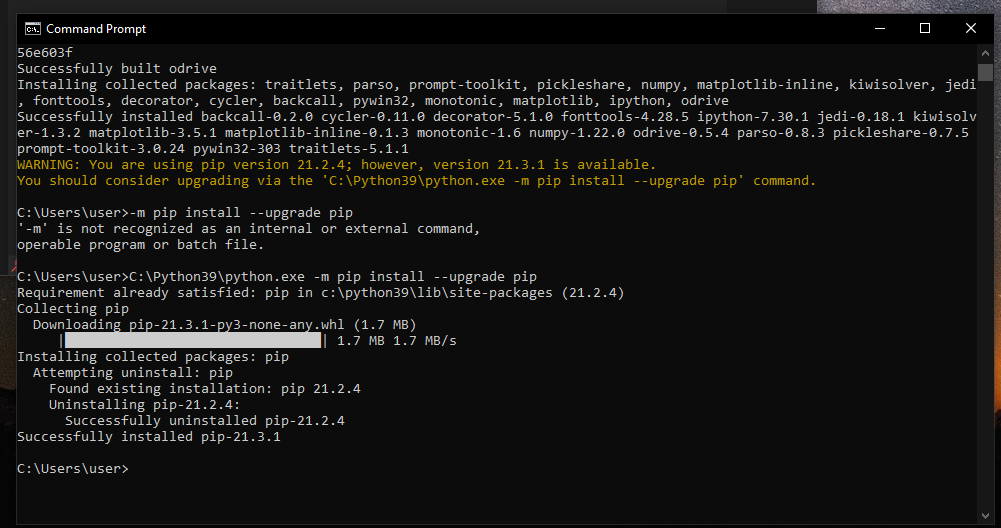

## To start odrive or after erasing configuration or saving configuration or after reboot we need to run this command 
    import odrive
    odrv0=odrive.find_any()


In [1]:
import odrive
odrv0=odrive.find_any()

In [ ]:
 odrv0.erase_configuration()

In [1]:
import odrive
odrv0=odrive.find_any()

In [3]:
odrv0.axis0.motor.config.current_lim = 40
odrv0.axis0.controller.config.vel_limit = 69
odrv0.axis0.motor.config.calibration_current = 15
odrv0.config.enable_brake_resistor = True
odrv0.config.brake_resistance = 0.7
odrv0.axis0.motor.config.pole_pairs = 7
odrv0.axis0.motor.config.torque_constant = (8.27/270)
odrv0.axis0.motor.config.motor_type = 0
odrv0.axis0.encoder.config.cpr = 8192
odrv0.axis0.encoder.config.use_index = True
odrv0.axis0.controller.config.pos_gain = 13
odrv0.axis0.controller.config.vel_gain = 0.12
odrv0.axis0.controller.config.vel_integrator_gain = 0

In [28]:
 odrv0.save_configuration()

ObjectLostError: the object disappeared

In [76]:
import odrive
odrv0=odrive.find_any()

In [79]:
odrv0.axis0.requested_state = 3

In [7]:
 odrv0.axis0.requested_state = 8

# Input Modes


## INPUT_MODE_INACTIVE  —  0

## INPUT_MODE_PASSTHROUGH  —  1 

* will go to target value directly

### Valid Inputs:
     odrv0.axis0.controller.input_pos
     odrv0.axis0.controller.input_vel
     odrv0.axis0.controller.input_torque
### Valid Control modes:
    CONTROL_MODE_VOLTAGE_CONTROL  0
    CONTROL_MODE_TORQUE_CONTROL   1
    CONTROL_MODE_VELOCITY_CONTROL 2
    CONTROL_MODE_POSITION_CONTROL 3

## INPUT_MODE_VEL_RAMP  —  2

**Ramps a velocity command from the current value to the target value.**

### Configuration Values:
     odrv0.axis0.controller.config.vel_ramp_rate [turn/sec]
     odrv0.axis0.controller.config.inertia [Nm/(turn/s^2))]
### Valid inputs:
     odrv0.axis0.controller.input_vel
### Valid Control Modes:
    CONTROL_MODE_VELOCITY_CONTROL
## INPUT_MODE_POS_FILTER  —  3
### Configuration Values:
     odrv0.axis0.controller.config.input_filter_bandwidth
     odrv0.axis0.controller.config.inertia
### Valid inputs:
     odrv0.axis0.controller.input_pos
### Valid Control modes:
    CONTROL_MODE_POSITION_CONTROL

## INPUT_MODE_MIX_CHANNELS  —  4 
* not used


## INPUT_MODE_TRAP_TRAJ  —  5

### Configuration Values:
    odrv0.axis0.trap_traj.config.vel_limit
    odrv0.axis0.trap_traj.config.accel_limit
    odrv0.axis0.trap_traj.config.decel_limit
    odrv0.axis0.config.inertia
### Valid Inputs:
    odrv0.axis0.controller.input_pos
### Valid Control Modes:
    CONTROL_MODE_POSITION_CONTROL

## INPUT_MODE_TORQUE_RAMP  —  6

### Configuration Values:
    config.torque_ramp_rate
### Valid Inputs:
    input_torque
### Valid Control Modes:
    CONTROL_MODE_TORQUE_CONTROL

## INPUT_MODE_MIRROR  —  7

### Configuration Values
    config.axis_to_mirror
    config.mirror_ratio
### Valid Inputs
    None. Inputs are taken directly from the other axis encoder estimates
### Valid Control modes
    CONTROL_MODE_POSITION_CONTROL
    CONTROL_MODE_VELOCITY_CONTROL
    CONTROL_MODE_TORQUE_CONTROL

## INPUT_MODE_Tuning  —  8

# Axis state
* AXIS_STATE_UNDEFINED  —  0
* AXIS_STATE_IDLE  —  1
* AXIS_STATE_STARTUP_SEQUENCE  —  2
* AXIS_STATE_FULL_CALIBRATION_SEQUENCE  —  3
* AXIS_STATE_MOTOR_CALIBRATION  —  4
* AXIS_STATE_ENCODER_INDEX_SEARCH  —  6

* AXIS_STATE_ENCODER_OFFSET_CALIBRATION  —  7
* AXIS_STATE_CLOSED_LOOP_CONTROL  —  8
* AXIS_STATE_LOCKIN_SPIN  —  9
* AXIS_STATE_ENCODER_DIR_FIND  —  10
* AXIS_STATE_HOMING  —  11
* AXIS_STATE_ENCODER_HALL_POLARITY_CALIBRATION  —  12

* AXIS_STATE_ENCODER_HALL_PHASE_CALIBRATION  —  13










In [4]:
odrv0.axis0.requested_state = 7

In [10]:
odrv0.axis1.encoder.config.index_offset

0.0

In [9]:
odrv0.axis0.controller.config.control_mode = 2
odrv0.axis0.controller.config.vel_ramp_rate = 1
odrv0.axis0.controller.config.input_mode = 2

In [22]:
odrv0.axis0.controller.input_vel = 0

In [24]:
odrv0.axis0.encoder.config.pre_calibrated = True
odrv0.axis0.encoder.config.use_index = True

In [25]:
odrv0.axis0.controller.config.control_mode = 3

In [30]:
odrv0.axis0.error

0

In [31]:
odrv0.axis0.encoder.config.phase_offset

5165

In [2]:
odrv0.axis0.encoder.config.direction

1

In [5]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [ ]:
import odrive
odrv0=odrive.find_any()

In [3]:
odrv0.axis0.motor.I_bus

0.009007374756038189

In [2]:
odrv0.axis0.motor.is_calibrated 

True

In [48]:
odrv0.axis0.requested_state = 3

In [40]:
odrv0.axis0.requested_state = 8

In [41]:
odrv0.axis0.requested_state = 4 # motor calibration

In [44]:
 odrv0.axis0.motor.config.pre_calibrated = True

In [49]:
odrv0.axis0.requested_state = 7

In [50]:
odrv0.axis0.requested_state = 8

In [51]:
odrv0.axis0.config.startup_encoder_offset_calibration = True

False

In [52]:
odrv0.axis0.config.startup_closed_loop_control = True

In [2]:
odrv0.axis0.controller.config.control_mode

3

In [3]:
odrv0.axis0.controller.config.vel_limit

69.0

In [4]:
odrv0.axis0.controller.config.input_mode = 5

In [56]:
odrv0.axis0.trap_traj.config.vel_limit = 30

In [57]:
odrv0.axis0.trap_traj.config.accel_limit = 5

In [59]:
odrv0.axis0.trap_traj.config.decel_limit = 5

In [60]:
odrv0.save_configuration()

False

In [61]:
odrv0.axis0.requested_state = 1

In [62]:
odrv0.save_configuration()

Exception: internal libfibre error

In [1]:
import odrive
odrv0=odrive.find_any()
#As the startup sequence is already set to true below statement not needed to run
# odrv0.axis0.requested_state = 2

odrv0.axis0.controller.config.control_mode

3

In [28]:
odrv0.axis0.requested_state = 6

In [27]:
odrv0.axis0.requested_state = 3

In [29]:
odrv0.axis0.requested_state = 8

In [32]:
odrv0.axis0.controller.input_pos = 1


In [15]:
odrv0.axis0.controller.config.circular_setpoints

False

In [14]:
odrv0.axis0.controller.config.input_filter_bandwidth

2.0

In [16]:
odrv0.axis0.controller.config.input_mode = 3

In [7]:
odrv0.axis0.controller.input_pos = 0

In [24]:
odrv0.clear_errors()

In [39]:
odrv0.axis0.controller.config.circular_setpoints

False

In [17]:
odrv0.clear_errors()

In [4]:
odrv0.axis0.controller.config.pos_gain = 13
odrv0.axis0.controller.config.vel_gain = 0.12
odrv0.axis0.controller.config.vel_integrator_gain = 0

In [4]:
odrv0.axis0.controller.config.vel_gain

0.11999999731779099

In [3]:
odrv0.axis0.controller.config.pos_gain

13.0

In [5]:
odrv0.axis0.controller.config.vel_integrator_gain

0.0

# Trajectory control mode
* [Video Link](https://youtu.be/VkocKXeqtS0)

### Set the control mode to position control

odrv0.axis0.controller.config.control_mode = 3 # for position control mode

odrv0.axis0.controller.config.input_mode = 5 #for trap traj mode

**first we need to check for configuration parameters** 

odrv0.axis0.trap_traj.config.vel_limit = 60

odrv0.axis0.trap_traj.config.accel_limit = 30

odrv0.axis0.trap_traj.config.decel_limit = 30


* Now start giving pos values


odrv0.axis0.controller.input_pos = 0

**To enable circular position control within one rotation we need to set**

odrv0.axis0.controller.config.circular_setpoints= True

# Position control mode different position for Axis 0

In [6]:
import odrive
odrv0=odrive.find_any()
#As the startup sequence is already set to true below statement not needed to run
# odrv0.axis0.requested_state = 2

In [7]:
odrv0.axis0.controller.config.control_mode = 3

In [37]:
odrv0.axis0.trap_traj.config.accel_limit

30.0

In [29]:
odrv0.axis0.trap_traj.config.vel_limit = 25
odrv0.axis0.trap_traj.config.accel_limit = 10
odrv0.axis0.trap_traj.config.decel_limit = 10
odrv0.axis0.controller.config.control_mode = 3 # for position control mode

odrv0.axis0.controller.config.input_mode = 5 #for trap traj mode

In [25]:
odrv0.axis0.requested_state = 6

In [26]:
odrv0.axis0.requested_state = 8

In [27]:
odrv0.axis0.controller.input_pos = 10

In [28]:
odrv0.axis0.controller.config.circular_setpoints = False
from ipywidgets import interact
import ipywidgets as widgets

def set_pos(pos):
    odrv0.axis0.controller.input_pos = pos # pos represents turns
    
interact(set_pos, pos=(0,1000,10))

interactive(children=(IntSlider(value=500, description='pos', max=1000, step=10), Output()), _dom_classes=('wi…

<function __main__.set_pos(pos)>

In [92]:
odrv0.axis0.requested_state = 1

In [23]:
odrv0.clear_errors()

# Position control mode different position For Axis 1

In [70]:
import odrive
odrv0=odrive.find_any()
#As the startup sequence is already set to true below statement not needed to run
# odrv0.axis1.requested_state = 2

odrv0.axis1.controller.config.control_mode

3

In [71]:
odrv0.axis1.trap_traj.config.vel_limit = 5
odrv0.axis1.trap_traj.config.accel_limit = 1
odrv0.axis1.trap_traj.config.decel_limit = 1
odrv0.axis1.controller.config.control_mode = 3 # for position control mode

odrv0.axis1.controller.config.input_mode = 5 #for trap traj mode

In [72]:
odrv0.axis1.requested_state = 6

In [73]:
odrv0.axis1.requested_state = 8

In [39]:
odrv0.axis1.trap_traj.config.vel_limit = 10

odrv0.axis1.trap_traj.config.accel_limit = 2

odrv0.axis1.trap_traj.config.decel_limit = 2

In [74]:
odrv0.axis1.controller.config.circular_setpoints = False
from ipywidgets import interact
import ipywidgets as widgets

def set_pos_1(pos_1):
    odrv0.axis1.controller.input_pos = pos_1
    
interact(set_pos_1, pos_1=(0,2,0.1))

interactive(children=(FloatSlider(value=1.0, description='pos_1', max=2.0), Output()), _dom_classes=('widget-i…

<function __main__.set_pos_1(pos_1)>

In [6]:
odrv0.axis0.controller.start_anticogging_calibration()

In [7]:
odrv0.axis0.controller.config.anticogging.calib_anticogging

True

In [19]:
odrv0.axis0.controller.config.pos_gain = 13
odrv0.axis0.controller.config.vel_gain = 0.12
odrv0.axis0.controller.config.vel_integrator_gain = 0

In [11]:
odrv0.clear_errors()

In [30]:
odrv0.axis0.requested_state = 2

In [32]:
odrv0.config.dc_max_negative_current

-0.009999999776482582

In [33]:
odrv0.axis0.motor.config.resistance_calib_max_voltage

2.0

In [34]:
odrv0.axis0.motor.config.requested_current_range

60.0

# Velocity control mode different velocity for Axis 0
* [Video link](https://youtu.be/rRarRRkv_WU)

In [ ]:
import odrive
odrv0=odrive.find_any()

if encoder is detached from the motor then perform these steps

In [22]:
odrv0.axis0.requested_state = 3

In [23]:
odrv0.axis0.requested_state = 7

In [24]:
odrv0.axis0.requested_state = 4

In [8]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

otherwise start with below steps

In [5]:
odrv0.axis0.requested_state = 6

AttributeError: 'EmptyInterface' object has no attribute 'axis0'

In [3]:
odrv0.axis0.requested_state = 8

In [27]:
odrv0.axis0.controller.config.control_mode = 2 # Velocity control mode
odrv0.axis0.controller.config.vel_ramp_rate = 30
odrv0.axis0.controller.config.input_mode = 2 #INPUT_MODE_VEL_RAMP

In [28]:
 odrv0.axis0.controller.config.vel_limit = 130

In [139]:
odrv0.clear_errors()

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

def set_vel_0(vel_0):
    odrv0.axis0.controller.input_vel = vel_0
    
interact(set_vel_0, vel_0=(0,80,5))

interactive(children=(IntSlider(value=40, description='vel_0', max=80, step=5), Output()), _dom_classes=('widg…

<function __main__.set_vel_0(vel_0)>

In [31]:
odrv0.axis0.requested_state = 1

# Velocity Control mode different velocity for Axis 1

In [40]:
odrv0.axis1.requested_state = 6

In [41]:
odrv0.axis1.requested_state = 8

In [23]:
odrv0.axis1.controller.config.control_mode = 2 # Velocity control mode
odrv0.axis1.controller.config.vel_ramp_rate = 1
odrv0.axis1.controller.config.input_mode = 2 #INPUT_MODE_VEL_RAMP

from ipywidgets import interact
import ipywidgets as widgets

def set_vel_1(vel_1):
    odrv0.axis1.controller.input_vel = vel_1
    
interact(set_vel_1, vel_1=(0,6,0.1))

interactive(children=(FloatSlider(value=3.0, description='vel_1', max=6.0), Output()), _dom_classes=('widget-i…

<function __main__.set_vel_1(vel_1)>

In [51]:
odrv0.clear_errors()

In [5]:
odrv0.axis0.controller.config.input_mode

5

In [2]:
odrv0.config.dc_max_positive_current

inf

In [3]:
odrv0.axis0.requested_state = 1 #AXIS_STATE_IDLE

In [14]:
odrv0.axis0.controller.input_pos = 0 #turns

In [11]:
odrv0.axis0.requested_state = 8

In [97]:
odrv0.axis0.encoder.config.pre_calibrated

True

# AXIS 1 Motor setup

In [1]:
import odrive
odrv0=odrive.find_any()

In [2]:
odrv0.axis1.motor.config.pole_pairs = 7

odrv0.axis1.motor.config.calibration_current = 15

odrv0.axis1.motor.config.motor_type = 0 # high current

odrv0.axis1.motor.config.resistance_calib_max_voltage = 4

odrv0.axis1.motor.config.torque_constant = (8.27/270)

odrv0.axis1.motor.config.current_lim = 40

odrv0.axis1.motor.config.calibration_current = 15
odrv0.axis1.motor.config.requested_current_range =60

In [3]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [4]:
import odrive
odrv0=odrive.find_any()

In [5]:
odrv0.axis1.encoder.config.mode = 0 # incremental

odrv0.axis1.encoder.config.cpr = 8192

odrv0.axis1.encoder.config.bandwidth = 1000

odrv0.axis1.config.calibration_lockin.current = 10

odrv0.axis1.config.calibration_lockin.ramp_time = 0.4

odrv0.axis1.config.calibration_lockin.ramp_distance = 3.1415927410125732

odrv0.axis1.config.calibration_lockin.accel = 20

odrv0.axis1.config.calibration_lockin.vel = 40

In [6]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [7]:
import odrive
odrv0=odrive.find_any()

In [8]:
odrv0.axis1.controller.config.control_mode = 3 #CONTROL_MODE_POSITION_CONTROL
odrv0.axis1.controller.config.vel_limit = 10
odrv0.axis1.controller.config.pos_gain = 13
odrv0.axis1.controller.config.vel_gain = 0.12
odrv0.axis1.controller.config.vel_integrator_gain = 0
odrv0.axis1.controller.config.input_mode = 5 # trap traj
odrv0.axis1.trap_traj.config.vel_limit = 10
odrv0.axis1.trap_traj.config.accel_limit = 2
odrv0.axis1.trap_traj.config.decel_limit = 2
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [9]:
import odrive
odrv0=odrive.find_any()

In [10]:
odrv0.axis1.motor.is_calibrated # check

True

In [11]:
odrv0.axis1.requested_state = 4 # AXIS_STATE_MOTOR_CALIBRATION

In [12]:
odrv0.axis1.motor.config.pre_calibrated = True

In [14]:
odrv0.axis1.requested_state = 6 #AXIS_STATE_ENCODER_INDEX_SEARCH

In [15]:
odrv0.axis1.requested_state = 7 # AXIS_STATE_ENCODER_OFFSET_CALIBRATION

In [16]:
odrv0.axis1.error

0

In [17]:
odrv0.axis1.encoder.config.phase_offset

-4627

In [18]:
odrv0.axis1.encoder.config.direction

-1

In [19]:
odrv0.axis1.encoder.config.use_index = True

In [20]:
odrv0.axis1.encoder.config.pre_calibrated = True

In [21]:
odrv0.axis1.motor.config.pre_calibrated = True

In [22]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [23]:
import odrive
odrv0=odrive.find_any()

In [37]:
odrv0.axis1.requested_state = 6 # encoder index search

In [38]:
odrv0.axis1.requested_state = 8 # close loop control

In [30]:
odrv0.axis1.requested_state = 3

In [27]:
odrv0.axis1.controller.config.control_mode

3

In [28]:
odrv0.axis1.controller.config.input_mode

5

In [32]:
odrv0.axis1.controller.input_pos = 2

In [33]:
odrv0.axis1.trap_traj.config.vel_limit

10.0

In [34]:
odrv0.axis1.trap_traj.config.accel_limit

2.0

In [35]:
odrv0.axis1.trap_traj.config.decel_limit

2.0

In [36]:
odrv0.axis1.controller.config.control_mode

3

In [39]:
odrv0.axis1.controller.input_pos = 10

In [40]:
quit

# Anticogging calibration

In [73]:
odrv0.axis1.controller.config.control_mode = 3 #position control mode

In [80]:
odrv0.axis1.controller.config.input_mode = 1 # input mode pass through

In [81]:
odrv0.axis1.requested_state = 6 #encoder index search

In [85]:
odrv0.axis1.requested_state = 8 #close loop control

In [83]:
odrv0.axis1.controller.config.pos_gain = 130
odrv0.axis1.controller.config.vel_integrator_gain = 2

In [84]:
odrv0.axis1.controller.start_anticogging_calibration()

In [68]:
odrv0.axis0.controller.config.anticogging.calib_anticogging

False

In [16]:
odrv0.axis0.controller.config.anticogging.pre_calibrated = True

In [104]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [72]:
odrv0.clear_errors()

In [35]:
odrv0.axis1.requested_state = 3

In [36]:
odrv0.axis1.requested_state = 8

In [20]:
odrv0.axis0.controller.config.anticogging.calib_anticogging

AttributeError: 'EmptyInterface' object has no attribute 'axis0'

In [17]:
odrv0.axis1.controller.config.pos_gain = 13

odrv0.axis1.controller.config.vel_integrator_gain = (0.5*10*0.12)

In [ ]:
 odrv0.save_configuration()

In [25]:
odrv0.axis1.controller.config.input_mode

5

In [37]:
odrv0.axis1.trap_traj.config.vel_limit = 10

odrv0.axis1.trap_traj.config.accel_limit = 1

odrv0.axis1.trap_traj.config.decel_limit = 1

In [ ]:
odrv0.axis1.controller.config.pos_gain = 13

odrv0.axis1.controller.config.vel_gain = 0.12

odrv0.axis1.controller.config.vel_integrator_gain = 0

In [94]:
odrv0.axis1.controller.config.pos_gain = 0

odrv0.axis1.controller.config.vel_gain = 0

odrv0.axis1.controller.config.vel_integrator_gain = 0

In [90]:
odrv0.axis1.controller.config.vel_gain = 

In [95]:
odrv0.clear_errors()

In [100]:
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [44]:
odrv0.axis1.requested_state = 1

In [45]:
odrv0.axis1.motor.config.current_lim = 40
odrv0.axis1.controller.config.vel_limit = 69
odrv0.axis1.motor.config.calibration_current = 15
odrv0.config.enable_brake_resistor = True
odrv0.config.brake_resistance = 0.7
odrv0.axis1.motor.config.pole_pairs = 7
odrv0.axis1.motor.config.torque_constant = (8.27/270)
odrv0.axis1.motor.config.motor_type = 0
odrv0.axis1.encoder.config.cpr = 8192
odrv0.axis1.encoder.config.use_index = True
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [56]:
odrv0.axis1.controller.config.pos_gain = 15
odrv0.axis1.controller.config.vel_gain = 0.16
odrv0.axis1.controller.config.vel_integrator_gain = 0.32
odrv0.axis1.requested_state = 3

In [57]:
odrv0.axis1.requested_state = 8 # close loop control
odrv0.axis1.controller.config.control_mode = 2 # velocity  control mode
odrv0.axis1.controller.config.vel_ramp_rate = 0.5
odrv0.axis1.controller.config.input_mode = 2 #INPUT_MODE_VEL_RAMP

In [58]:
odrv0.axis1.controller.input_vel = 1

In [64]:
odrv0.axis1.requested_state = 1

In [46]:
import odrive
odrv0=odrive.find_any()

In [48]:
odrv0.axis1.requested_state = 6

In [49]:
odrv0.axis1.requested_state = 8

In [50]:
odrv0.axis1.controller.config.control_mode

3

In [51]:
odrv0.axis1.controller.config.input_mode

5

In [52]:
odrv0.axis1.controller.input_pos = 10

In [75]:
quit

# D5312s motor setup on Axis0

In [1]:
import odrive
odrv0=odrive.find_any()

In [26]:
odrv0.config.enable_brake_resistor = True

odrv0.config.brake_resistance = 0.7

odrv0.config.dc_bus_undervoltage_trip_level = 8

odrv0.config.dc_bus_overvoltage_trip_level = 25.5

odrv0.config.dc_max_positive_current = 20

odrv0.config.dc_max_negative_current = -0.010

odrv0.config.max_regen_current = 0

odrv0.save_configuration()

ObjectLostError: the object disappeared

In [27]:
import odrive
odrv0=odrive.find_any()

In [28]:
odrv0.axis0.motor.config.pole_pairs = 7
odrv0.axis0.motor.config.calibration_current = 15
odrv0.axis0.motor.config.motor_type = 0	# high current
odrv0.axis0.motor.config.resistance_calib_max_voltage = 2
odrv0.axis0.motor.config.torque_constant = (8.27/330) #replace 270 with 330 for d5312 motor
odrv0.axis0.motor.config.current_lim = 40 #keep it 35 for d5312s motor
odrv0.axis0.motor.config.requested_current_range =60
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [29]:
import odrive
odrv0=odrive.find_any()

In [31]:
odrv0.axis0.config.calibration_lockin.vel

40.0

In [32]:
odrv0.axis0.encoder.config.mode = 0 # incremental
odrv0.axis0.encoder.config.cpr = 8192
odrv0.axis0.encoder.config.bandwidth = 1000 #check first
odrv0.axis0.config.calibration_lockin.current = 10 # check first
odrv0.axis0.config.calibration_lockin.ramp_time = 0.4 
odrv0.axis0.config.calibration_lockin.ramp_distance = 3.1415927410125732 
odrv0.axis0.config.calibration_lockin.accel = 10 
odrv0.axis0.config.calibration_lockin.vel = 20
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [33]:
import odrive
odrv0=odrive.find_any()

In [8]:
odrv0.axis0.controller.config.control_mode = 3  #CONTROL_MODE_POSITION_CONTROL

odrv0.axis0.controller.config.vel_limit = 69 # (69 * 60)rpm 

odrv0.axis0.controller.config.pos_gain = 10
 
odrv0.axis0.controller.config.vel_gain = 0.06
 
odrv0.axis0.controller.config.vel_integrator_gain = 0
odrv0.axis0.controller.config.input_mode = 5 # trap traj

odrv0.axis0.trap_traj.config.vel_limit = 50

odrv0.axis0.trap_traj.config.accel_limit = 10

odrv0.axis0.trap_traj.config.decel_limit = 10
odrv0.save_configuration()

ObjectLostError: the object disappeared

In [34]:
import odrive
odrv0=odrive.find_any()

In [35]:
odrv0.axis0.motor.is_calibrated  # check

True

In [18]:
odrv0.axis0.requested_state = 4 # AXIS_STATE_MOTOR_CALIBRATION

In [16]:
odrv0.axis0.requested_state = 3

In [19]:
odrv0.axis0.motor.config.pre_calibrated = True

In [20]:
odrv0.axis0.requested_state = 7 # encoder offset calibration

In [22]:
odrv0.axis0.requested_state = 8 # closed loop control

In [21]:
odrv0.axis0.controller.config.pos_gain = 10
 
odrv0.axis0.controller.config.vel_gain = 0.06
 
odrv0.axis0.controller.config.vel_integrator_gain = 0

In [24]:
odrv0.axis0.encoder.config.use_index = True

odrv0.save_configuration()

ObjectLostError: the object disappeared

In [1]:
import odrive
odrv0=odrive.find_any()

In [3]:
odrv0.axis0.requested_state = 6

In [4]:
odrv0.axis0.requested_state = 8

In [2]:
odrv0.axis0.controller.config.pos_gain = 10
 
odrv0.axis0.controller.config.vel_gain = 0.06
 
odrv0.axis0.controller.config.vel_integrator_gain = 0